# Group the spectral peaks of geophone data by time and frequency and compute the counts

In [1]:
# Imports
from os.path import join
from numpy import linspace
from pandas import DataFrame, date_range, read_csv, Timestamp, Timedelta
from time import time

from utils_basic import SPECTROGRAM_DIR as indir, GEO_STATIONS as stations
from utils_spec import assemble_spec_filename, find_geo_station_spectral_peaks, get_spectrogram_file_suffix, get_spec_peak_file_suffix, read_geo_spectrograms, read_spectral_peaks, save_spectral_peak_counts, update_spectral_peak_group_counts
from utils_plot import plot_array_spec_peak_counts, save_figure
from multiprocessing import Pool

In [2]:
# Inputs
# Data
window_length = 1.0
overlap = 0.0
downsample = False
downsample_factor = 60
prom_threshold = 10
rbw_threshold = 0.2

min_freq = None
max_freq = 200.0

file_ext_in = "h5"

# Grouping
count_threshold = 4

# Saving the results
file_format_out = "hdf"

# Plotting
starttime_plot = "2020-01-13T20:00:00"
endtime_plot = "2020-01-13T21:00:00"

date_format = "%Y-%m-%d %H:%M:%S"
major_time_spacing = "15min"
minor_time_spacing = "5min"

size_scale = 30

In [3]:
# Process the detections of each station
suffix_spec = get_spectrogram_file_suffix(window_length, overlap, downsample)
suffix_peak = get_spec_peak_file_suffix(prom_threshold, rbw_threshold, min_freq = min_freq, max_freq = max_freq)


# Initialize the spectral-peak group count
for i, station in enumerate(stations):
    print(f"Working on {station}...")
    clock1 = time()

    # Read the spectral peaks
    print("Reading the spectral peaks...")
    filename = f"geo_spectral_peaks_{station}_{suffix_spec}_{suffix_peak}.{file_ext_in}"
    inpath = join(indir, filename)
    peak_df = read_spectral_peaks(inpath)
    num_peaks = len(peak_df)
    print(f"{num_peaks} peaks are read.")

    # Update the spectral-peak group count
    print("Updating the group counts...")
    if i == 0:
        cum_count_df = update_spectral_peak_group_counts(peak_df)
    else:
        cum_count_df = update_spectral_peak_group_counts(peak_df, counts_to_update = cum_count_df)
    print("Update finished")

    cum_num_peaks = len(cum_count_df)
    max_count = cum_count_df["count"].max()
    print(f"Cummulative number of peaks: {cum_num_peaks}")
    print(f"Maximum count: {max_count}")
    
    clock2 = time()
    elapse = clock2 - clock1
    print(f"Finished processing {station}.")
    print(f"Elapsed time: {elapse} s")

# Keep only the bins with counts over the threshold
cum_count_df["count"] = cum_count_df["count"].astype(int)
cum_count_df = cum_count_df[cum_count_df["count"] >= count_threshold]
cum_count_df.reset_index(drop = True, inplace = True)
    

Working on A01...
Reading the spectral peaks...
9944211 peaks are read.
Updating the group counts...
Update finished
Cummulative number of peaks: 9944211
Maximum count: 1
Finished processing A01.
Elapsed time: 2.6739630699157715 s
Working on A02...
Reading the spectral peaks...
10093834 peaks are read.
Updating the group counts...
Update finished
Cummulative number of peaks: 17564790
Maximum count: 2
Finished processing A02.
Elapsed time: 7.609158515930176 s
Working on A03...
Reading the spectral peaks...
10598911 peaks are read.
Updating the group counts...
Update finished
Cummulative number of peaks: 24806523
Maximum count: 3
Finished processing A03.
Elapsed time: 9.26776933670044 s
Working on A04...
Reading the spectral peaks...
10727417 peaks are read.
Updating the group counts...
Update finished
Cummulative number of peaks: 31292705
Maximum count: 4
Finished processing A04.
Elapsed time: 11.968113899230957 s
Working on A05...
Reading the spectral peaks...
9883413 peaks are read.
U

In [4]:
# Save the counts
file_stem = f"geo_spectral_peak_counts_{suffix_spec}_{suffix_peak}_count{count_threshold}"
save_spectral_peak_counts(cum_count_df, file_stem, file_format_out)

Results saved to /fp/projects01/ec332/data/spectrograms/geo_spectral_peak_counts_window1s_overlap0.0_prom10db_rbw0.2_freq0to200hz_count4.h5


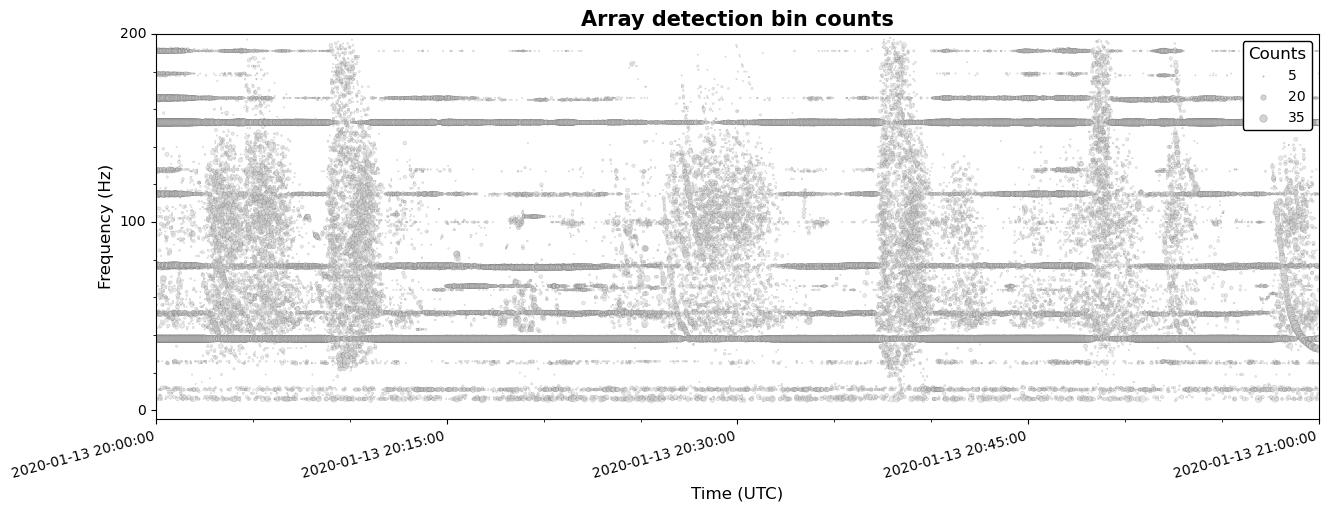

In [5]:
# Plot the bin counts in the example time range
fig, ax = plot_array_spec_peak_counts(cum_count_df,
                                        size_scale = size_scale, 
                                        starttime = starttime_plot, endtime = endtime_plot, freq_lim = (min_freq, max_freq),
                                        date_format = date_format,
                                        major_time_spacing = major_time_spacing, minor_time_spacing = minor_time_spacing)

In [6]:
len(cum_count_df)

20458036